**Instalação e importação de pacotes**

In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.5 MB/s eta 0:00:00


In [ ]:
!pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 KB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.9 MB/s eta 0:00:00
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting unins

In [ ]:
!python -m spacy download pt_core_news_lg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-23 19:12:26.919960: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 19:12:28.312838: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:12:28.312975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [ ]:
import spacy
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from unidecode import unidecode
import re
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report 
from math import pi
from skimpy import skim

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Mounted at /content/drive


**Definição de tratamentos para pré-processamento dos dados**

In [ ]:
# Carrega o modelo spacy em Portugês
pln = spacy.load('pt_core_news_lg')

In [ ]:
# Definição de stopwords
with open('drive/MyDrive/TCC/stop_words.txt') as arq:
    stop = arq.readlines()
stop = [x.rstrip('\n') for x in stop] 

In [ ]:
# Definição de expressoes sexualizadas
with open('drive/MyDrive/TCC/expressoes_sexualizadas.txt') as arq:
    termo = arq.readlines()
expressoes_sexualizadas = [x.rstrip('\n') for x in termo] 

In [ ]:
# Definição de palavras sexualizadas
with open('drive/MyDrive/TCC/palavras_sexualizadas.txt') as arq:
    termo = arq.readlines()
palavras_sexualizadas = [x.rstrip('\n') for x in termo] 

In [ ]:
#Função para pre processamento da base de dados (Limpeza, remoção de stopwords e tokenização dos dados)
def preprocessamentosemreplace(texto):
  
  # Atribui o pacote de pontuações a uma variável
  pontuacoes = string.punctuation
  # Converte em minúsculo
  texto = texto.lower()
  # Remove acentuação
  texto = unidecode(texto)
  # Remove pontuação
  texto = ''.join(x for x in texto if x not in punctuation)
  # Remove números
  texto = ''.join(x for x in texto if not x.isdigit())
  # Remove tags
  texto = re.sub('<[^<]+?>','', texto)

  # Atribui pacote de tratamento de PLN ao texto de entrada a uma variável
  documento = pln(texto)

  # Gera uma lista vazia
  lista = []

  # Quebra o texto de origem em tokens(palavras)
  for token in documento:
    lista.append(token.text)

  #  A lista recebe os tokens que não são stopwords ou espaço em branco
  lista = [palavra for palavra in lista if palavra not in stop and not palavra.isspace()]

  # Converte a lista em uma string
  texto_tratado = ' '.join([str(elemento) for elemento in lista])

  # Retorna o texto tratado
  return texto_tratado


In [ ]:
#Função para pre processamento da base de dados (Limpeza, remoção de stopwords e tokenização dos dados)
def preprocessamento(texto):
  
  # Atribui o pacote de pontuações a uma variável
  pontuacoes = string.punctuation
  # Converte em minúsculo
  texto = texto.lower()
  # Remove acentuação
  texto = unidecode(texto)
  # Remove pontuação
  texto = ''.join(x for x in texto if x not in punctuation)
  # Remove números
  texto = ''.join(x for x in texto if not x.isdigit())
  # Remove tags
  texto = re.sub('<[^<]+?>','', texto)

  # Substitui expressoes sexualizadas
  for expressoes in expressoes_sexualizadas:
    texto = texto.replace(expressoes,"sexual")

  # Atribui pacote de tratamento de PLN ao texto de entrada a uma variável
  documento = pln(texto)

  # Gera uma lista vazia
  lista = []

  # Quebra o texto de origem em tokens(palavras)
  for token in documento:
    lista.append(token.text)

  #  A lista recebe os tokens que não são stopwords ou espaço em branco
  lista = [palavra for palavra in lista if palavra not in stop and not palavra.isspace()]
  
  # Substitui palavras sexualizadas
  for index, palavra in enumerate(lista):
    if palavra in palavras_sexualizadas:
      lista[index] = "sexual"

  # Converte a lista em uma string
  texto_tratado = ' '.join([str(elemento) for elemento in lista])

  # Retorna o texto tratado
  return texto_tratado


In [ ]:
teste = preprocessamento('Maria foi na rua comprar 1 açucar para sua mãe fazer pudim-.., mas na verdade foi fazer amor, vamos fazer amor,vem me mamar')
teste

'maria rua comprar acucar sua mae fazer pudim mas verdade sexual vamos sexualvem me sexual'

In [ ]:
# Função para converter o dataset para binário
def convertebin(data, arquivo):
    db = spacy.tokens.DocBin()
    docs = []
    for doc, label in pln.pipe(data, as_tuples=True):
        doc.cats["SEX"] = label == "sexualizada"
        doc.cats["NEU"] = label == "neutra"
        db.add(doc)
    
    db.to_disk(arquivo)

**Importação e pré processamento da base de dados de treinamento**



In [ ]:
# Importação da base e verificação do tamanho
base_treinamento = pd.read_csv('drive/MyDrive/TCC/base_treinamento.csv', encoding = 'utf-8')
base_treinamento.shape


(387, 4)

In [ ]:
# Visualização dos primeiros registros da base
base_treinamento.head()

,musica,interprete,classificacao,letra
0,50 por Cento,Naiara Azevedo,sexualizada,Ninguém merece desprezo Meio amor meio beijo N...
1,A Caminho do Bega,DJ Patrick Muniz,sexualizada,DJ Patrick Muniz O mestre do mandelão A caminh...
2,A Cera,O Surto,neutra,Eu 'tava ali Ela também ela também estava ali ...
3,A Dança Do Bumbum,É O Tchan,sexualizada,… Cheguei hein! Estou no paraíso Que abundânci...
4,A Estrada,Cidade Negra,neutra,Uh uh uh Você não sabe o quanto eu caminhei Pr...


[Text(0, 0, '197'), Text(0, 0, '190')]

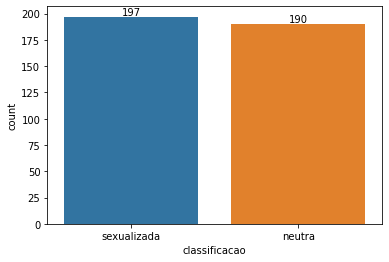

In [ ]:
# Verificação gráfica da quantidade de registros por classe (sexualizada ou neutra)
qtd = base_treinamento['classificacao'].value_counts().rename_axis('classificacao').reset_index(name='count')
graf = sns.barplot(x='classificacao', y='count', data=qtd)
graf.bar_label(graf.containers[0])

In [ ]:
# Aplica a função de pré processamento no campo letra
base_treinamento_original = base_treinamento['letra'].apply(preprocessamentosemreplace)

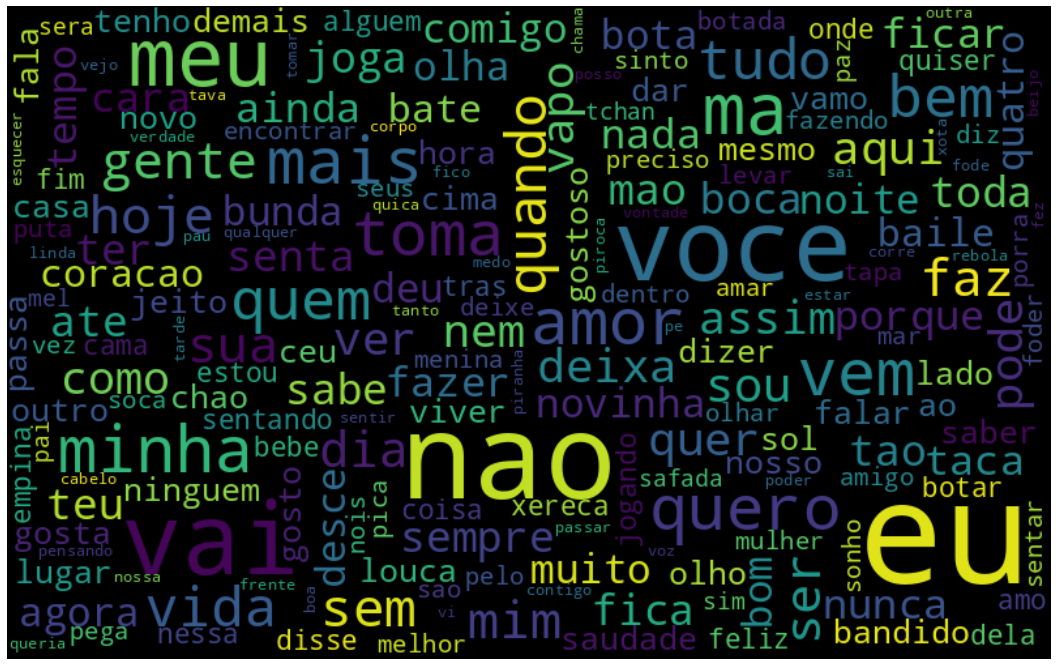

In [ ]:
# Gerar nuvem de palavras
palavras = ' '.join([texto for texto in base_treinamento_original])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Aplica a função de pré processamento no campo letra
base_treinamento['letra'] = base_treinamento['letra'].apply(preprocessamento)

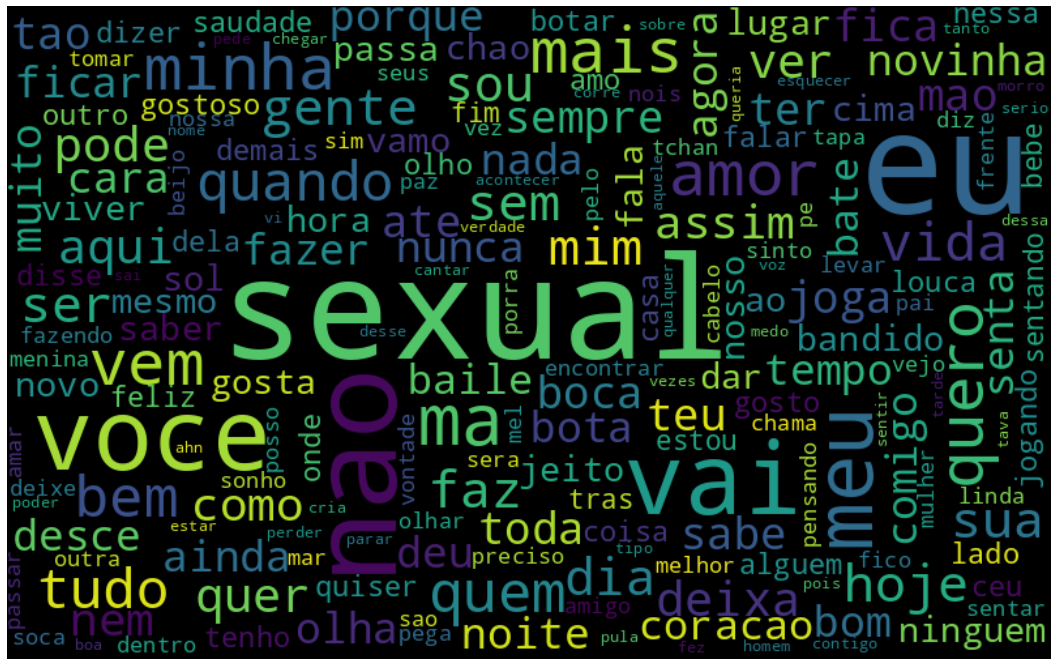

In [ ]:
# Gerar nuvem de palavras
palavras = ' '.join([texto for texto in base_treinamento['letra']])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Gera arquivo 
base_treinamento.to_csv('drive/MyDrive/TCC/base_treinamento_tratada.csv', sep=',', index = False, encoding='utf-8')

In [ ]:
# Divisão do dataset de treinamento em base de treino e desenvolvimento
base_teste_tratada = list(base_treinamento[["letra", "classificacao"]].sample(frac=1).itertuples(index=False, name=None))
base_train = base_teste_tratada[:300]
base_dev = base_teste_tratada[300:362]
print(f"Total: {len(base_teste_tratada)} - Train:  {len(base_train)} - Dev: {len(base_dev)}")

Total: 387 - Train:  300 - Dev: 62


In [ ]:
# Conversão do dataset de treinamento e desenvolvimento para binário
convertebin(base_train, "drive/MyDrive/TCC/train.spacy") 
convertebin(base_dev, "drive/MyDrive/TCC/dev.spacy") 

**Importação e pré processamento da base de dados de teste**


In [ ]:
# Importação da base e verificação do tamanho
base_ecad = pd.read_csv('drive/MyDrive/TCC/base_ecad.csv', encoding = 'utf-8')
base_ecad.shape

(362, 5)

[Text(0, 0, '285'), Text(0, 0, '77')]

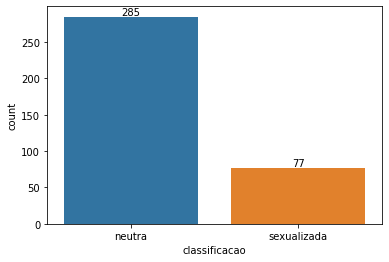

In [ ]:
# Verificação gráfica da quantidade de registros por classe (sexualizada ou neutra)
qtd = base_ecad['classificacao'].value_counts().rename_axis('classificacao').reset_index(name='count')
graf = sns.barplot(x='classificacao', y='count', data=qtd)
graf.bar_label(graf.containers[0])

In [ ]:
# Aplica a função de pré processamento no campo letra
base_ecad_original = base_ecad['letra'].apply(preprocessamentosemreplace)

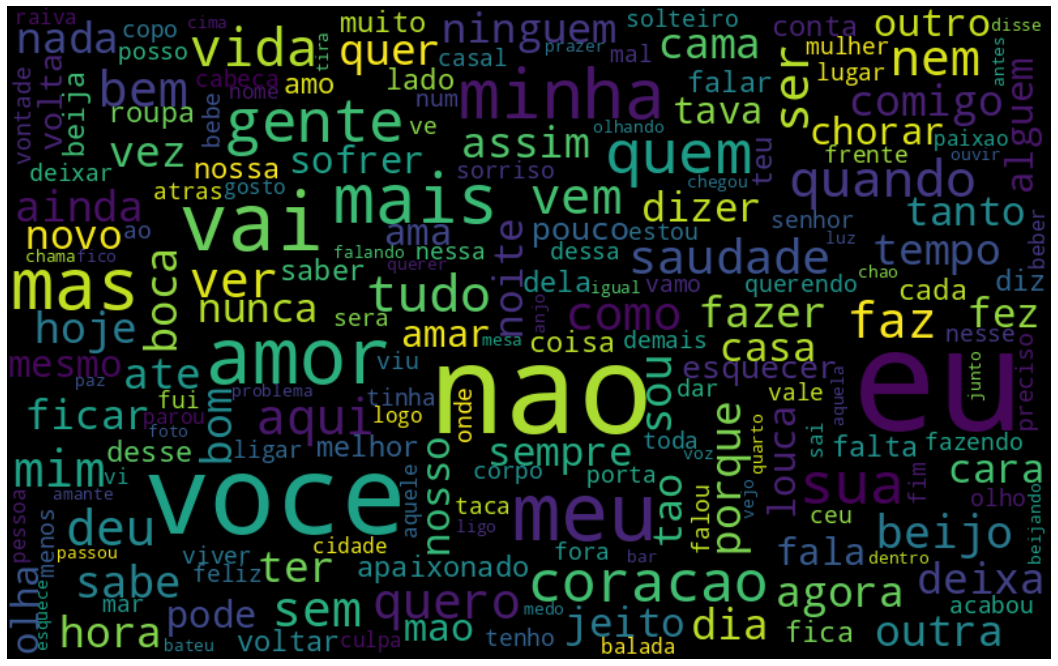

In [ ]:
# Gerar nuvem de palavras
palavras_ecad = ' '.join([texto for texto in base_ecad_original])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_ecad)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Aplica a função de pré processamento no campo letra
base_ecad['letra'] = base_ecad['letra'].apply(preprocessamento)
# Visualização dos primeiros registros da base
base_ecad.head()

,musica,compositores,idioma,classificacao,letra
0,Se joga no passinho,Juninho Kassanikeo/Deco Teclas,PT,neutra,vem prazer ter voce aqui deixa comigo brisa st...
1,Aí eu ligo,Arthur Castro/Matheus Mattos/Paulinha Gonçalve...,PT,neutra,deu novo sextou aonde vai dar dia chopp dobro ...
2,Raridade,Anderson Freire,PT,neutra,nao consigo alem teu olhar tudo eu consigo ima...
3,Viva voz,Chaianne/Lucas Souza/Murilo Costa/Junior Sillva,PT,sexualizada,deve muito bom voce me ligar hora sua foto nao...
4,Acertou a mao,Bruno Caliman/Raffa Torres,PT,neutra,alguem quiser sorriso pagar milhao vende nao a...


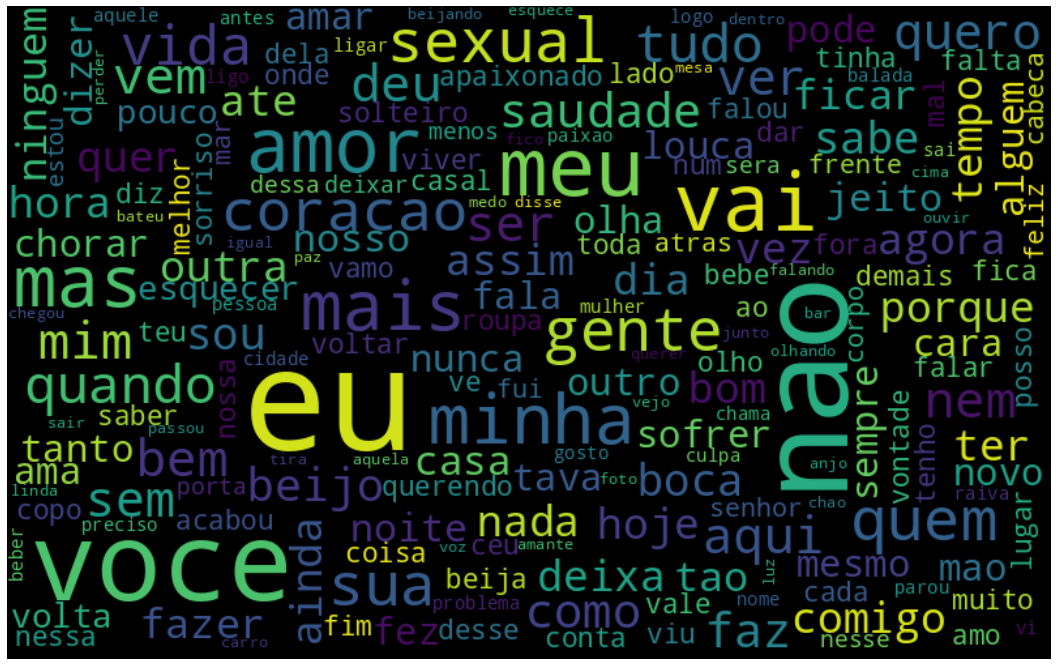

In [ ]:
# Gerar nuvem de palavras
palavras_ecad = ' '.join([texto for texto in base_ecad['letra']])
nuvem_palvras = WordCloud(width= 800, height= 500, max_font_size = 110,collocations = False).generate(palavras_ecad)
plt.figure(figsize=(24,12))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Gera arquivo 
base_ecad.to_csv('drive/MyDrive/TCC/base_ecad_tratada.csv', sep=',', index = False, encoding='utf-8')

In [ ]:
# Conversão do dataset de treinamento para binário
base_teste_tratada = list(base_ecad[["letra", "classificacao"]].sample(frac=1).itertuples(index=False, name=None))
convertebin(base_teste_tratada, "drive/MyDrive/TCC/test.spacy") 

**Aplicação do modelo de classificação**

In [ ]:
# Criação de arquivo com os hiperparâmetros do modelo
#!python -m spacy init config  --lang pt --pipeline textcat --optimize efficiency --force config.cfg
!python -m spacy init fill-config drive/MyDrive/TCC/base_config.cfg drive/MyDrive/TCC/config.cfg

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-23 19:16:13.261795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:16:13.262012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:16:13.262055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
# Treinamento do modelo
!python -m spacy train drive/MyDrive/TCC/config.cfg --paths.train drive/MyDrive/TCC/train.spacy --paths.dev drive/MyDrive/TCC/dev.spacy --output drive/MyDrive/TCC/model --verbose


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-23 19:16:25.887950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:16:25.888094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:16:25.888119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

>**Avaliação do modelo**

In [ ]:
# Avaliação do modelo na base ecad
!python -m spacy evaluate drive/MyDrive/TCC/model/model-best/ drive/MyDrive/TCC/test.spacy

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-23 19:58:39.933117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:58:39.933362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-23 19:58:39.933492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
# Teste de avaliação do modelo
texts = ["vamos ao shopping hoje", "quero ver você pelada na minha cama","vamos fazer amor","quero ir passear com você no parque"]
modelo_pln = spacy.load("drive/MyDrive/TCC/model/model-best")
for text in texts:
    doc = modelo_pln(preprocessamento(text))
    print(doc.cats,  "-",  text)

{'SEX': 0.0002957858960144222, 'NEU': 0.9997041821479797} - vamos ao shopping hoje
{'SEX': 1.0, 'NEU': 5.042699591228939e-10} - quero ver você pelada na minha cama
{'SEX': 1.0, 'NEU': 3.1387754808459567e-12} - vamos fazer amor
{'SEX': 0.001047522877342999, 'NEU': 0.9989525079727173} - quero ir passear com você no parque


In [ ]:
base_ecad.head()

,musica,compositores,idioma,classificacao,letra
0,Se joga no passinho,Juninho Kassanikeo/Deco Teclas,PT,neutra,vem prazer ter voce aqui deixa comigo brisa st...
1,Aí eu ligo,Arthur Castro/Matheus Mattos/Paulinha Gonçalve...,PT,neutra,deu novo sextou aonde vai dar dia chopp dobro ...
2,Raridade,Anderson Freire,PT,neutra,nao consigo alem teu olhar tudo eu consigo ima...
3,Viva voz,Chaianne/Lucas Souza/Murilo Costa/Junior Sillva,PT,sexualizada,deve muito bom voce me ligar hora sua foto nao...
4,Acertou a mao,Bruno Caliman/Raffa Torres,PT,neutra,alguem quiser sorriso pagar milhao vende nao a...


In [ ]:
# Aplica o mondelo na base do ecad para recuperar a classificação prevista de cada música
modelo_pln = spacy.load("drive/MyDrive/TCC/model/model-best")
for index, texto in base_ecad.iterrows():
    doc = modelo_pln(texto["letra"])
    #print(doc.cats,  "-",  texto)
    prev_sexualizada = format(doc.cats['SEX'], '.5f')
    prev_neutra = format(doc.cats['NEU'], '.5f')
    base_ecad.loc[index,"previsao_sexualizada"] = prev_sexualizada
    base_ecad.loc[index,"previsao_neutra"] = prev_neutra
    if prev_sexualizada >= prev_neutra:
      base_ecad.loc[index,"previsao"] = "sexualizada"
    else:
      base_ecad.loc[index,"previsao"] = "neutra" 

In [ ]:
# Métrica de acurácia referente a aplicação do modelo na base de ecad
accuracy_score(base_ecad['classificacao'].values, base_ecad['previsao'].values)

0.8397790055248618

<Axes: >

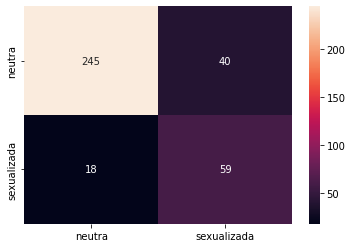

In [ ]:
# Matriz de confusão referente a aplicação do modelo na base de ecad
cm_ecad = confusion_matrix(base_ecad['classificacao'].values, base_ecad['previsao'].values)
sns.heatmap(cm_ecad, annot=True, fmt='.3g', xticklabels = ["neutra","sexualizada"], yticklabels = ["neutra","sexualizada"])

In [ ]:
# Relatório de métricas referente a aplicação do modelo na base ecad
print(classification_report(base_ecad['classificacao'].values, base_ecad['previsao'].values))

              precision    recall  f1-score   support

      neutra       0.93      0.86      0.89       285
 sexualizada       0.60      0.77      0.67        77

    accuracy                           0.84       362
   macro avg       0.76      0.81      0.78       362
weighted avg       0.86      0.84      0.85       362

